# Условие задачи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

# План работ

Загрузим данные

In [1]:
import pandas as pd
contract = pd.read_csv('/Users/nikitadmitriev/Downloads/data/contract.csv')
internet = pd.read_csv('/Users/nikitadmitriev/Downloads/data/internet.csv')
personal = pd.read_csv('/Users/nikitadmitriev/Downloads/data/personal.csv')
phone = pd.read_csv('/Users/nikitadmitriev/Downloads/data/phone.csv')

Посмотрим на данные по контрактам.

In [2]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [3]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
contract['TotalCharges'].value_counts(normalize = True)

20.2       0.001562
           0.001562
19.75      0.001278
20.05      0.001136
19.65      0.001136
             ...   
1940.85    0.000142
6215.35    0.000142
1743.9     0.000142
1108.2     0.000142
474.9      0.000142
Name: TotalCharges, Length: 6531, dtype: float64

В графе TotalCharges присутсвуют пропуски.В дальнейшем их необходимо убрать для приведения данных к нужному формату.

Посмотрим на данные по интернету.

In [5]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [7]:
print (internet['InternetService'].value_counts(normalize=True))
print (internet['OnlineSecurity'].value_counts(normalize=True))
print (internet['OnlineBackup'].value_counts(normalize=True))
print (internet['DeviceProtection'].value_counts(normalize=True))
print (internet['TechSupport'].value_counts(normalize=True))
print (internet['StreamingTV'].value_counts(normalize=True))
print (internet['StreamingMovies'].value_counts(normalize=True))

Fiber optic    0.561175
DSL            0.438825
Name: InternetService, dtype: float64
No     0.63404
Yes    0.36596
Name: OnlineSecurity, dtype: float64
No     0.559724
Yes    0.440276
Name: OnlineBackup, dtype: float64
No     0.560993
Yes    0.439007
Name: DeviceProtection, dtype: float64
No     0.629509
Yes    0.370491
Name: TechSupport, dtype: float64
No     0.509335
Yes    0.490665
Name: StreamingTV, dtype: float64
No     0.504803
Yes    0.495197
Name: StreamingMovies, dtype: float64


Посмотрим персональные данные о пользователях.

In [8]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
print (personal['gender'].value_counts(normalize=True))
print (personal['SeniorCitizen'].value_counts(normalize=True))
print (personal['Partner'].value_counts(normalize=True))
print (personal['Dependents'].value_counts(normalize=True))

Male      0.504756
Female    0.495244
Name: gender, dtype: float64
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64


Посмотрим на данные, связанные с телефонией.

In [11]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [12]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [13]:
phone['MultipleLines'].value_counts(normalize=True)

No     0.532935
Yes    0.467065
Name: MultipleLines, dtype: float64

Перед тем как приступить к анализу необходимо объединить данные в один датасет. В личных данных и данных о контрактах одинаковое количество строк, но в данных по интернету и телефонии оно различается (не у всех клиентов есть интеренет или подключен телефон).

In [14]:
data = contract.merge(personal, on='customerID', how='left')
data = data.merge(phone, on='customerID', how='outer')
data = data.merge(internet, on='customerID', how='outer')

Теперь необходимо заполнить пропуски и привести данные к нужному формату.

In [15]:
#в строке MultipleLines заменим пропуски на No phone service, 
#чтобы различать пользователей без данной услуги (No) и пользователей, не пользующихся телефоние (No phone service)
data['MultipleLines'] = data['MultipleLines'].fillna('No phone service')
#по такому же принципу заменить пропуски в данных о интерент функциях
data['InternetService'] = data['InternetService'].fillna('No internet service')
data['OnlineSecurity'] = data['OnlineSecurity'].fillna('No internet service')
data['OnlineBackup'] = data['OnlineBackup'].fillna('No internet service')
data['DeviceProtection'] = data['DeviceProtection'].fillna('No internet service')
data['TechSupport'] = data['TechSupport'].fillna('No internet service')
data['StreamingTV'] = data['StreamingTV'].fillna('No internet service')
data['StreamingMovies'] = data['StreamingMovies'].fillna('No internet service')

Заполним пропуски в графе TotalCharges

In [16]:
import numpy as np
data['TotalCharges'] = data['TotalCharges'].replace(' ' ,np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)
#Уберем строки с пропусками, так как их количество 0.1562% от общего количества данных 
data = data.dropna()
data = data.reset_index()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   BeginDate         7032 non-null   object 
 3   EndDate           7032 non-null   object 
 4   Type              7032 non-null   object 
 5   PaperlessBilling  7032 non-null   object 
 6   PaymentMethod     7032 non-null   object 
 7   MonthlyCharges    7032 non-null   float64
 8   TotalCharges      7032 non-null   float64
 9   gender            7032 non-null   object 
 10  SeniorCitizen     7032 non-null   int64  
 11  Partner           7032 non-null   object 
 12  Dependents        7032 non-null   object 
 13  MultipleLines     7032 non-null   object 
 14  InternetService   7032 non-null   object 
 15  OnlineSecurity    7032 non-null   object 
 16  OnlineBackup      7032 non-null   object 


In [18]:
data.head(20)

,index,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
5,5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50,Female,...,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Male,...,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,Female,...,No,No,No phone service,DSL,Yes,No,No,No,No,No
8,8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,Female,...,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,Male,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No


Приведем данные о датах к нужному формату.

In [19]:
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format='%Y-%m-%d')
data['EndDate'] = pd.to_datetime(data['EndDate'], format='%Y-%m-%d %H:%M:%S', errors = 'ignore')
data['EndDate'] = data['EndDate'].replace('No',np.nan)

Теперь мы можем разделить датасет на две части: клиенты, у которых заканчивается контракт, и клиенты, у которых на данный момент нет даты окончания контракта.

In [20]:
data_enddate = data[data['EndDate'] == data['EndDate']]
data_no_enddate = data[data['EndDate'] != data['EndDate']]

Посмотрим на различия в двух выборках.

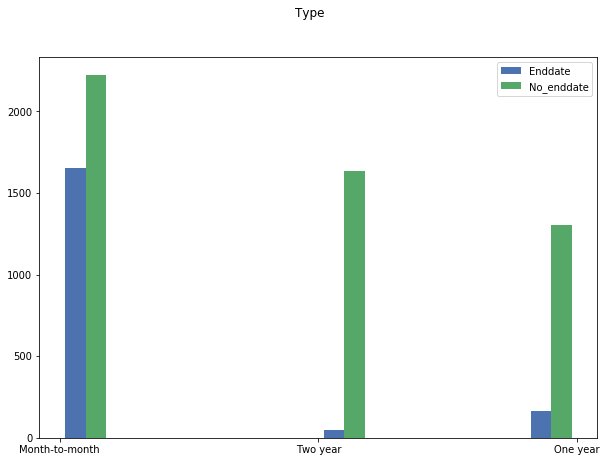

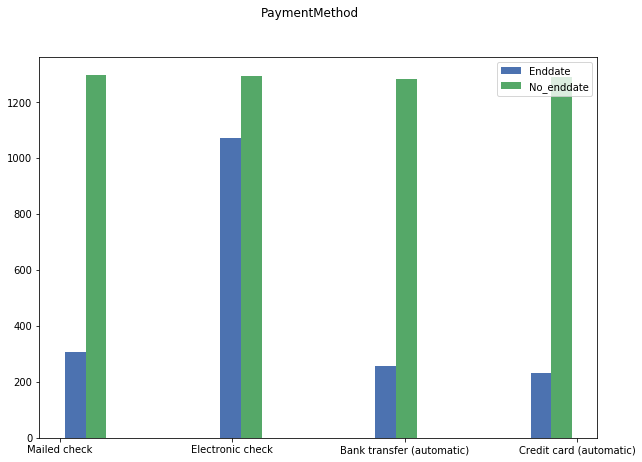

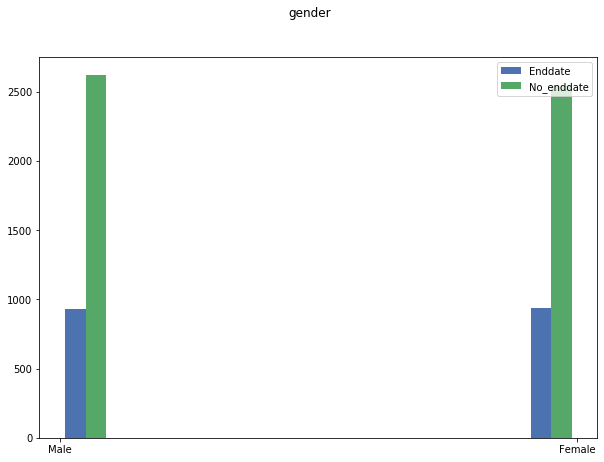

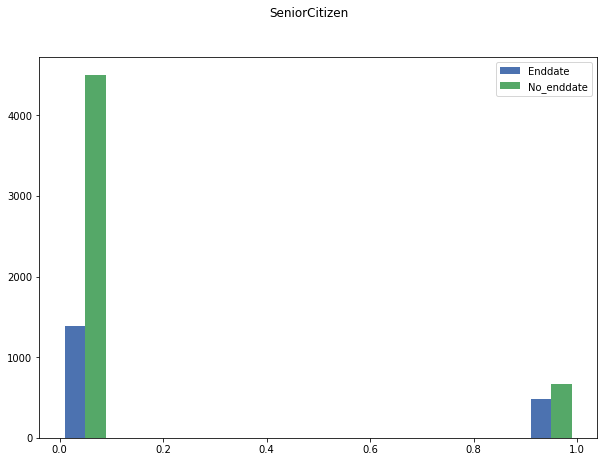

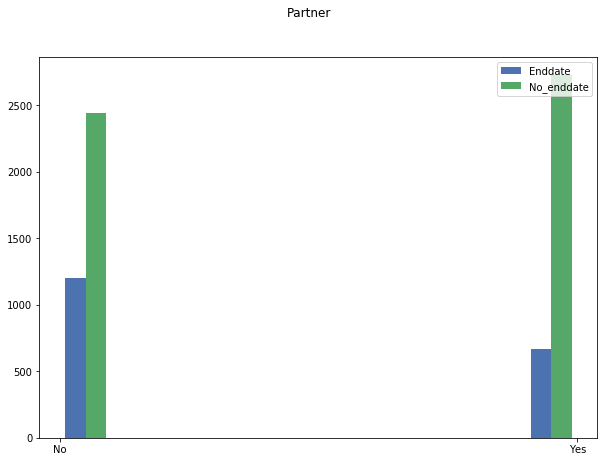

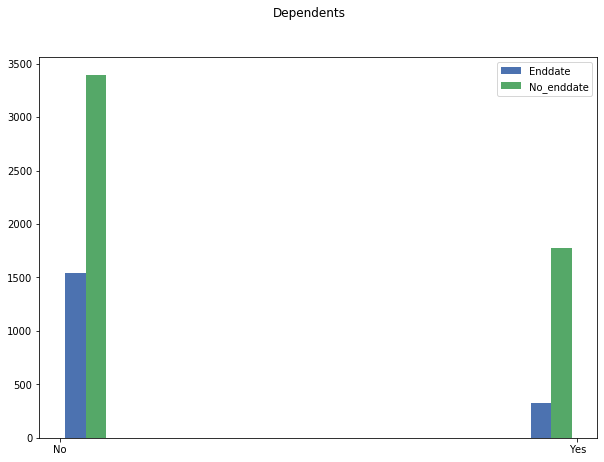

In [21]:
import matplotlib.pyplot as plt
cat_cols = ['Type', 'PaymentMethod','gender','SeniorCitizen','Partner','Dependents']
for i in cat_cols:
    plt.figure(figsize=(10,7))
    plt.style.use('seaborn-deep')
    x = data_enddate[i]
    y = data_no_enddate[i]
    plt.hist([x, y], label=['Enddate', 'No_enddate'])
    plt.suptitle(i)
    plt.legend(loc='upper right')
    plt.show()

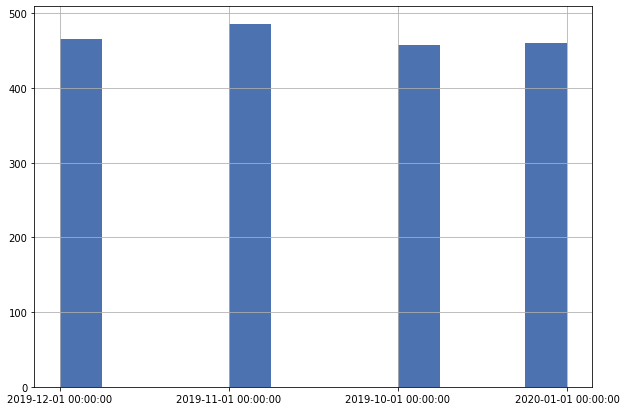

In [22]:
data_enddate['EndDate'].hist(bins=12, figsize=(10,7))

По данным видно, что люди уходят последние 4 месяца.

### Уточняющие вопросы

1. Нет целевого признака. Но его можно выделить из графы EndDate. Насколько корректно это делать?
2. С чем может быть связано то, что люди уходят только последние 4 месяца?

### Примерный план решения задачи.

1. Подготовить датасет (убрать дизбаланс классов, подготовить категориальные признаки с помощью порядкого кодирования, выделить целевой признак.
2. Разделить датасет на тренировочную, тестовую и валидационную выборки.
3. Предсказать с поведение клиентов с помощью средств "классического" машинного обучения (логистическая регрессия, решающий лес) и более продвинутых алгоритмов (к примеру использующих градиентный бустинг).
4. Проверить качество обученных моделей и выбрать лучшую.

# Код решения

Выделим целевой признак (Churn) из EndDate. 1 - дата окончания контракта есть, 0 - ее нет.

In [23]:
import numpy as np
data['Churn'] = data['EndDate'].where(data['EndDate'] != data['EndDate'], 1)
data['Churn'] =data['Churn'].fillna(0)
#Информация о договорах актуальна на 1 февраля 2020. Чтобы узнать длительность контракта по клиенту заполним пропуски в EndDate на эту дату.
data['EndDate'] =data['EndDate'].fillna('2020-02-01 00:00:00')
data['EndDate'] = pd.to_datetime(data['EndDate'], format='%Y-%m-%d %H:%M:%S')
#посчитаем продолжительность контракта
data['Duration'] = (data['EndDate']-data['BeginDate']).dt.days
#Теперь мы можем удалить столбцы CustomerID, BeginDate, EndDate
data = data.drop(columns = ['index', 'customerID','BeginDate', 'EndDate'], axis=1)
data.head(70)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,Duration
0,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,0,31
1,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,0,1036
2,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1,61
3,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1371
4,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Month-to-month,Yes,Electronic check,75.30,244.10,Female,0,No,No,No,DSL,No,Yes,No,Yes,Yes,Yes,0,92
66,One year,Yes,Electronic check,78.90,3650.35,Male,0,Yes,No,Yes,Fiber optic,No,Yes,No,No,No,No,0,1432
67,Two year,No,Mailed check,79.20,2497.20,Female,0,No,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,0,945
68,Two year,No,Bank transfer (automatic),20.15,930.90,Female,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,1523


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   gender            7032 non-null   object 
 6   SeniorCitizen     7032 non-null   int64  
 7   Partner           7032 non-null   object 
 8   Dependents        7032 non-null   object 
 9   MultipleLines     7032 non-null   object 
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null   object 


Подготовим категориальные признаки с помощью порядкового кодирования.

In [25]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ['Type','PaperlessBilling','PaymentMethod','gender','SeniorCitizen','Partner',
            'Dependents', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
encoder = OrdinalEncoder()
data_ordinal = data
data_ordinal[cat_cols] = encoder.fit_transform(data[cat_cols])

In [26]:
data_ordinal.head(20)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,Duration
0,0.0,1.0,2.0,29.85,29.85,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,31
1,1.0,0.0,3.0,56.95,1889.50,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0,1036
2,0.0,1.0,3.0,53.85,108.15,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1,61
3,1.0,0.0,0.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0,1371
4,0.0,1.0,2.0,70.70,151.65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,61
5,0.0,1.0,2.0,99.65,820.50,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,1,245
6,0.0,1.0,1.0,89.10,1949.40,1.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0,671
7,0.0,0.0,3.0,29.75,301.90,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,306
8,0.0,1.0,2.0,104.80,3046.05,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1,853
9,1.0,0.0,0.0,56.15,3487.95,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0,1888


Подгтовим признаки и целевой признак.

In [27]:
from sklearn.model_selection import train_test_split
target = data_ordinal['Churn']
features = data_ordinal.drop('Churn', axis=1)
#разделим на выборки
features_train, features_v_t, target_train, target_v_t = train_test_split(features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_v_t, target_v_t, test_size=0.50, random_state=12345)

In [28]:
target_train.value_counts()

0    3097
1    1122
Name: Churn, dtype: int64

Сделаем объекты редкого класса не такими редкими, для этого используем upsampling.

In [29]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
print (target_upsampled.value_counts())

0    3097
1    2244
Name: Churn, dtype: int64


Обучим модели логистической регресси и случайного леса.

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [31]:
%%time
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr.predict(features_valid)
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print ('ROC_AUC', roc_auc_score(target_valid,probabilities_one_valid))
print ('Accuracy', accuracy_score(target_valid, predicted_valid))

ROC_AUC 0.8525226187484293
Accuracy 0.7724039829302988
CPU times: user 28.4 ms, sys: 1.65 ms, total: 30.1 ms
Wall time: 21.3 ms


In [32]:
best_result = 0
best_n_of_est = 10
best_depth = 0
for n_of_est in range(10, 200, 40):
    for depth in range(2, 16, 1):
        model = RandomForestClassifier(n_estimators=n_of_est, max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if roc_auc_score(target_valid,probabilities_one_valid) > best_result:
            best_result = roc_auc_score(target_valid,probabilities_one_valid)
            best_n_of_est = n_of_est
            best_depth = depth
print ('Лучший результат ROC_AUC:', best_result,'при', best_n_of_est, 'оценщиках и макисмальной глубине', best_depth)    

Лучший результат ROC_AUC: 0.8728755654687108 при 130 оценщиках и макисмальной глубине 9


In [33]:
%%time
model_rf = RandomForestClassifier(n_estimators=130, max_depth=9, random_state=12345)
model_rf.fit(features_upsampled, target_upsampled)
predicted_valid = model_rf.predict(features_valid)
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print ('ROC_AUC', roc_auc_score(target_valid,probabilities_one_valid))
print ('Accuracy', accuracy_score(target_valid, predicted_valid))

ROC_AUC 0.8728755654687108
Accuracy 0.8072546230440967
CPU times: user 438 ms, sys: 4.36 ms, total: 443 ms
Wall time: 443 ms


Передем к более продвинутым методам.

Подберем лучшие параметры для CatBoostClassifier.

In [34]:
from sklearn.model_selection import GridSearchCV

model = CatBoostClassifier(loss_function="Logloss")


parameters = {'learning_rate' : [0.03, 0.1, 0.5,0,6, 1], 
              'iterations'    : [100,200,400]}

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1, scoring='roc_auc')
grid.fit(features_upsampled, target_upsampled, verbose=100)

print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 0.5238362	total: 54.2ms	remaining: 21.6s
100:	learn: 0.1324872	total: 280ms	remaining: 829ms
200:	learn: 0.0608032	total: 499ms	remaining: 494ms
300:	learn: 0.0351266	total: 724ms	remaining: 238ms
399:	learn: 0.0233842	total: 942ms	remaining: 0us

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9281987011099236

 The best parameters across ALL searched params:
 {'iterations': 400, 'learning_rate': 0.5}


In [35]:
%%time
model_cb = CatBoostClassifier(loss_function="Logloss", iterations=400, learning_rate=0.5)
model_cb.fit(features_upsampled, target_upsampled, cat_features=[], verbose=100)
predicted_valid = model_cb.predict(features_valid)
probabilities_valid = model_cb.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print ('ROC_AUC', roc_auc_score(target_valid,probabilities_one_valid))
print ('Accuracy', accuracy_score(target_valid, predicted_valid))

0:	learn: 0.5238362	total: 2.07ms	remaining: 826ms
100:	learn: 0.1324872	total: 234ms	remaining: 694ms
200:	learn: 0.0608032	total: 458ms	remaining: 453ms
300:	learn: 0.0351266	total: 704ms	remaining: 231ms
399:	learn: 0.0233842	total: 922ms	remaining: 0us
ROC_AUC 0.905619083521823
Accuracy 0.8513513513513513
CPU times: user 4.3 s, sys: 157 ms, total: 4.46 s
Wall time: 970 ms


Подберем лучшие параметры для LGBMClassifier.

In [36]:
import lightgbm as lgb

model = lgb.LGBMClassifier()


parameters = {'num_leaves'         : [10,20,30],
              'learning_rate' : [0.03, 0.1, 0.5, 1], 
              'n_estimators'    : [100,200,400]}

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1, scoring='roc_auc')
grid.fit(features_upsampled, target_upsampled)

print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)


 The best estimator across ALL searched params:
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=30, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 The best score across ALL searched params:
 0.923507222267554

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'n_estimators': 400, 'num_leaves': 30}


In [37]:
%%time

model_gbm = lgb.LGBMClassifier(num_leaves=30, learning_rate=0.1, n_estimators=400)

model_gbm.fit(features_upsampled, target_upsampled)
predicted_valid = model_gbm.predict(features_valid)
probabilities_valid = model_gbm.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print ('ROC_AUC', roc_auc_score(target_valid,probabilities_one_valid))
print ('Accuracy', accuracy_score(target_valid, predicted_valid))

ROC_AUC 0.9043363072798861
Accuracy 0.8499288762446657
CPU times: user 2.68 s, sys: 30.6 ms, total: 2.71 s
Wall time: 358 ms


Проверим качество обученных моделей на тестовой выборке.

In [38]:
predicted_valid = model_lr.predict(features_test)
probabilities_valid = model_lr.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print ('Logistic Regression')
print ('ROC_AUC', roc_auc_score(target_test,probabilities_one_valid))
print ('Accuracy', accuracy_score(target_test, predicted_valid))

Logistic Regression
ROC_AUC 0.8341170189829882
Accuracy 0.7583511016346838


In [39]:
predicted_valid = model_rf.predict(features_test)
probabilities_valid = model_rf.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print ('Random Forest')
print ('ROC_AUC', roc_auc_score(target_test,probabilities_one_valid))
print ('Accuracy', accuracy_score(target_test, predicted_valid))

Random Forest
ROC_AUC 0.8470503988583514
Accuracy 0.7931769722814499


In [40]:
predicted_valid = model_cb.predict(features_test)
probabilities_valid = model_cb.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print ('Catboost')
print ('ROC_AUC', roc_auc_score(target_test,probabilities_one_valid))
print ('Accuracy', accuracy_score(target_test, predicted_valid))

Catboost
ROC_AUC 0.8763872775992527
Accuracy 0.8237384506041222


In [41]:
predicted_valid = model_gbm.predict(features_test)
probabilities_valid = model_gbm.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print ('LGBM')
print ('ROC_AUC', roc_auc_score(target_test,probabilities_one_valid))
print ('Accuracy', accuracy_score(target_test, predicted_valid))

LGBM
ROC_AUC 0.8730352247877375
Accuracy 0.830135039090263


Посмотрим на полученные результаты.

In [42]:
results = pd.DataFrame({
        'Алгоритм обучения': ['CatBoost', 'LGBM', 'Логистическая Регрессия', 'Случайный Лес'],
        'Качество ROC_AUC': [0.88, 0.87, 0.83, 0.85],
        'Скорость обучения и предсказания': ['1.21s', '435 ms', '22 ms', '447 ms']})
results

,Алгоритм обучения,Качество ROC_AUC,Скорость обучения и предсказания
0,CatBoost,0.88,1.21s
1,LGBM,0.87,435 ms
2,Логистическая Регрессия,0.83,22 ms
3,Случайный Лес,0.85,447 ms


### Вывод

Рекомендую модель с Catboost, так как она показала лучшие результаты на тестовой выборке, но имея при этом самое большое время обучения и предсказания. Если данный критерий имеет большое значение в связи с большим количество данных и малой мощностью оборудования, предлагаю использовать LGBM алгоритм, метрики качества практически не отличаются от лучшего результата, при этом скорость обучения и предсказания практически в 3 раза быстрее. 